In [1]:
import pandas as pd
import os
import sys
import re
import time
import random
from datetime import datetime, timedelta
import math
import gc
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, chi2
import lightgbm as lgb
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.utils import resample
from sklearn.utils import shuffle
import os
import sys
import re
import time
import random
from datetime import datetime, timedelta
import math
import gc
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

## 读取数据并检查数据

In [2]:
df_raw = pd.read_excel("Arc_Orogenic_with_Gangdese55-68.xlsx",'Data For Training (3)')
df_raw.head()

,CITATIONS,LATITUDE,LONGITUDE,SAMPLE NAME,Label,crust_thickness,SIO2(WT%),TIO2(WT%),AL2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),K2O(WT%),NA2O(WT%),P2O5(WT%),CR(PPM),NI(PPM),RB(PPM),SR(PPM),Y(PPM),ZR(PPM),NB(PPM),BA(PPM),LA(PPM),CE(PPM),PR(PPM),ND(PPM),SM(PPM),EU(PPM),GD(PPM),TB(PPM),DY(PPM),ER(PPM),YB(PPM),LU(PPM),HF(PPM),TH(PPM),(La/Yb)n,Ln((La/Yb)n),Sr/Y,Rb/Sr
0,[24367][23830],-63.00,-61.00,s_DI-55 [24367],3,25.570,59.702065,1.458461,15.862021,7.031831,4.653029,2.020201,0.170487,1.122293,6.015838,0.456267,1.1964,1.3958,16.0,310.0,50.5479,335.989,11.1664,178.83454,20.482725,49.901815,6.997974,30.9,8.239798,2.461873,8.830307,1.507821,9.519362,5.387897,4.998533,0.783026,7.709839,2.73459,2.783702,1.023782,6.132797,0.051613
1,[2594],-62.95,-60.63,s_B.107.8 [2594],3,27.210,62.570000,1.210000,15.260000,6.450000,3.630000,1.240000,0.220000,1.210000,6.440000,0.300000,9.0000,4.0000,21.0,260.0,66.0000,496.000,14.0000,200.00000,28.000000,61.500000,NaN,34.7,8.640000,2.360000,9.160000,NaN,9.740000,6.430000,6.120000,NaN,NaN,4.00000,3.108022,1.133987,3.939394,0.080769
2,[5372],-50.00,-70.00,s_AG-2 [5372],4,32.375,64.360000,0.600000,16.540000,4.010000,4.930000,2.090000,0.090000,2.040000,4.200000,0.240000,38.0000,NaN,57.0,470.0,8.0000,141.000,5.0000,449.00000,28.500000,58.800000,NaN,19.5,3.400000,1.400000,NaN,0.770000,NaN,NaN,1.200000,0.250000,4.100000,11.60000,16.133966,2.780927,58.750000,0.121277
3,[5372],-50.00,-70.00,s_AG-5 [5372],4,32.375,62.350000,0.790000,16.610000,5.430000,5.710000,2.870000,0.090000,2.090000,4.170000,0.230000,28.0000,19.0000,57.0,511.0,15.0000,149.000,10.0000,447.00000,29.600000,59.700000,NaN,20.0,4.000000,1.100000,NaN,0.660000,NaN,NaN,1.320000,0.220000,4.100000,10.40000,15.233346,2.723487,34.066667,0.111546
4,[5372],-50.00,-70.00,s_AG-7 [5372],4,32.375,62.040000,0.790000,16.590000,5.460000,5.720000,2.910000,0.090000,2.160000,4.110000,0.250000,26.0000,18.0000,63.0,463.0,16.0000,150.000,11.0000,444.00000,29.300000,60.100000,NaN,21.1,4.000000,1.100000,NaN,0.470000,NaN,NaN,1.540000,0.190000,4.600000,10.70000,12.924818,2.559149,28.937500,0.136069


In [3]:
df = df_raw.copy()
df.shape

(2744, 42)

In [4]:
df.columns #Keep NA to see NA's impact

Index(['CITATIONS', 'LATITUDE', 'LONGITUDE', 'SAMPLE NAME', 'Label',
       'crust_thickness', 'SIO2(WT%)', 'TIO2(WT%)', 'AL2O3(WT%)', 'FEOT(WT%)',
       'CAO(WT%)', 'MGO(WT%)', 'MNO(WT%)', 'K2O(WT%)', 'NA2O(WT%)',
       'P2O5(WT%)', 'CR(PPM)', 'NI(PPM)', 'RB(PPM)', 'SR(PPM)', 'Y(PPM)',
       'ZR(PPM)', 'NB(PPM)', 'BA(PPM)', 'LA(PPM)', 'CE(PPM)', 'PR(PPM)',
       'ND(PPM)', 'SM(PPM)', 'EU(PPM)', 'GD(PPM)', 'TB(PPM)', 'DY(PPM)',
       'ER(PPM)', 'YB(PPM)', 'LU(PPM)', 'HF(PPM)', 'TH(PPM)', '(La/Yb)n',
       'Ln((La/Yb)n)', 'Sr/Y', 'Rb/Sr'],
      dtype='object')

In [5]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
df.shape

(2744, 42)

In [7]:
df  = df.drop(['CITATIONS',	'LATITUDE',	'LONGITUDE','MNO(WT%)',	'SAMPLE NAME','(La/Yb)n','Rb/Sr'], axis = 1)
# df.shape
df.head()

,Label,crust_thickness,SIO2(WT%),TIO2(WT%),AL2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),K2O(WT%),NA2O(WT%),P2O5(WT%),CR(PPM),NI(PPM),RB(PPM),SR(PPM),Y(PPM),ZR(PPM),NB(PPM),BA(PPM),LA(PPM),CE(PPM),PR(PPM),ND(PPM),SM(PPM),EU(PPM),GD(PPM),TB(PPM),DY(PPM),ER(PPM),YB(PPM),LU(PPM),HF(PPM),TH(PPM),Ln((La/Yb)n),Sr/Y
0,3,25.570,59.702065,1.458461,15.862021,7.031831,4.653029,2.020201,1.122293,6.015838,0.456267,1.1964,1.3958,16.0,310.0,50.5479,335.989,11.1664,178.83454,20.482725,49.901815,6.997974,30.9,8.239798,2.461873,8.830307,1.507821,9.519362,5.387897,4.998533,0.783026,7.709839,2.73459,1.023782,6.132797
1,3,27.210,62.570000,1.210000,15.260000,6.450000,3.630000,1.240000,1.210000,6.440000,0.300000,9.0000,4.0000,21.0,260.0,66.0000,496.000,14.0000,200.00000,28.000000,61.500000,NaN,34.7,8.640000,2.360000,9.160000,NaN,9.740000,6.430000,6.120000,NaN,NaN,4.00000,1.133987,3.939394
2,4,32.375,64.360000,0.600000,16.540000,4.010000,4.930000,2.090000,2.040000,4.200000,0.240000,38.0000,NaN,57.0,470.0,8.0000,141.000,5.0000,449.00000,28.500000,58.800000,NaN,19.5,3.400000,1.400000,NaN,0.770000,NaN,NaN,1.200000,0.250000,4.100000,11.60000,2.780927,58.750000
3,4,32.375,62.350000,0.790000,16.610000,5.430000,5.710000,2.870000,2.090000,4.170000,0.230000,28.0000,19.0000,57.0,511.0,15.0000,149.000,10.0000,447.00000,29.600000,59.700000,NaN,20.0,4.000000,1.100000,NaN,0.660000,NaN,NaN,1.320000,0.220000,4.100000,10.40000,2.723487,34.066667
4,4,32.375,62.040000,0.790000,16.590000,5.460000,5.720000,2.910000,2.160000,4.110000,0.250000,26.0000,18.0000,63.0,463.0,16.0000,150.000,11.0000,444.00000,29.300000,60.100000,NaN,21.1,4.000000,1.100000,NaN,0.470000,NaN,NaN,1.540000,0.190000,4.600000,10.70000,2.559149,28.937500


In [8]:
df.Label.value_counts()

5    927
4    688
6    497
3    360
2    108
7     92
8     72
Name: Label, dtype: int64

In [9]:
df.Label.nunique()

7

In [10]:
# def feature_ratios(df.feature):
#     plt.figure(figsize=(20, 16))
#     sns.countplot(df.feature, palette="Set3")
#     plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8')])

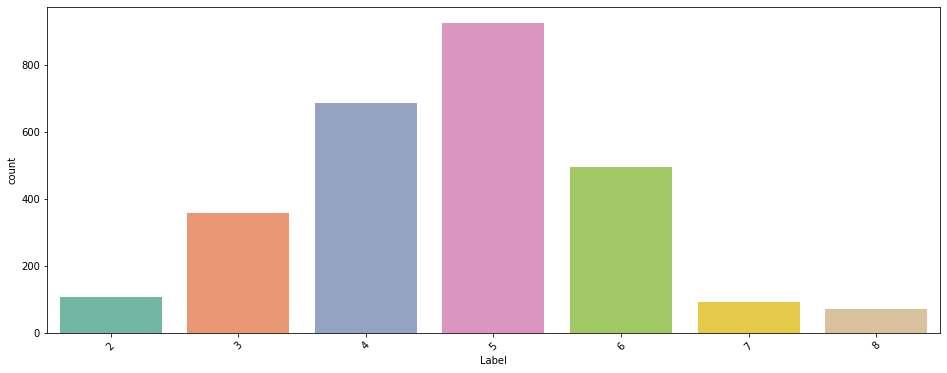

In [11]:
plt.figure(figsize=(16, 6))
sns.countplot(df.Label, palette="Set2")
plt.xticks(rotation=45)
plt.savefig

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Label            2744 non-null   int64  
 1   crust_thickness  2744 non-null   float64
 2   SIO2(WT%)        2744 non-null   float64
 3   TIO2(WT%)        2744 non-null   float64
 4   AL2O3(WT%)       2744 non-null   float64
 5   FEOT(WT%)        2744 non-null   float64
 6   CAO(WT%)         2744 non-null   float64
 7   MGO(WT%)         2744 non-null   float64
 8   K2O(WT%)         2744 non-null   float64
 9   NA2O(WT%)        2744 non-null   float64
 10  P2O5(WT%)        2744 non-null   float64
 11  CR(PPM)          2388 non-null   float64
 12  NI(PPM)          2411 non-null   float64
 13  RB(PPM)          2744 non-null   float64
 14  SR(PPM)          2744 non-null   float64
 15  Y(PPM)           2744 non-null   float64
 16  ZR(PPM)          2737 non-null   float64
 17  NB(PPM)       

In [13]:
#count the percentage of Nan
df.isnull().sum().sum() /(df.shape[0]* df.shape[1])

0.05514369012911287

## split data 

In [14]:
df = df.drop('crust_thickness',axis = 1)
Label= df['Label']
y = df.drop('Label', axis = 1)

In [15]:
y.head()

,SIO2(WT%),TIO2(WT%),AL2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),K2O(WT%),NA2O(WT%),P2O5(WT%),CR(PPM),NI(PPM),RB(PPM),SR(PPM),Y(PPM),ZR(PPM),NB(PPM),BA(PPM),LA(PPM),CE(PPM),PR(PPM),ND(PPM),SM(PPM),EU(PPM),GD(PPM),TB(PPM),DY(PPM),ER(PPM),YB(PPM),LU(PPM),HF(PPM),TH(PPM),Ln((La/Yb)n),Sr/Y
0,59.702065,1.458461,15.862021,7.031831,4.653029,2.020201,1.122293,6.015838,0.456267,1.1964,1.3958,16.0,310.0,50.5479,335.989,11.1664,178.83454,20.482725,49.901815,6.997974,30.9,8.239798,2.461873,8.830307,1.507821,9.519362,5.387897,4.998533,0.783026,7.709839,2.73459,1.023782,6.132797
1,62.570000,1.210000,15.260000,6.450000,3.630000,1.240000,1.210000,6.440000,0.300000,9.0000,4.0000,21.0,260.0,66.0000,496.000,14.0000,200.00000,28.000000,61.500000,NaN,34.7,8.640000,2.360000,9.160000,NaN,9.740000,6.430000,6.120000,NaN,NaN,4.00000,1.133987,3.939394
2,64.360000,0.600000,16.540000,4.010000,4.930000,2.090000,2.040000,4.200000,0.240000,38.0000,NaN,57.0,470.0,8.0000,141.000,5.0000,449.00000,28.500000,58.800000,NaN,19.5,3.400000,1.400000,NaN,0.770000,NaN,NaN,1.200000,0.250000,4.100000,11.60000,2.780927,58.750000
3,62.350000,0.790000,16.610000,5.430000,5.710000,2.870000,2.090000,4.170000,0.230000,28.0000,19.0000,57.0,511.0,15.0000,149.000,10.0000,447.00000,29.600000,59.700000,NaN,20.0,4.000000,1.100000,NaN,0.660000,NaN,NaN,1.320000,0.220000,4.100000,10.40000,2.723487,34.066667
4,62.040000,0.790000,16.590000,5.460000,5.720000,2.910000,2.160000,4.110000,0.250000,26.0000,18.0000,63.0,463.0,16.0000,150.000,11.0000,444.00000,29.300000,60.100000,NaN,21.1,4.000000,1.100000,NaN,0.470000,NaN,NaN,1.540000,0.190000,4.600000,10.70000,2.559149,28.937500


In [16]:
def plot_importance(feature_df, model, n_feature):
    '''
    Input:
        feature_df: The feature dataframe / The X_train with column names
        model: The training model
        n_feature: number of feature importance you want to display
    Output:
        A plot with the top n feature importance in decreasing order
    '''
    vals = model.feature_importances_
    df = pd.DataFrame(vals, index=feature_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    df_n = df.iloc[:n_feature,]
    plt.figure(figsize=(16, 9))
    sns.barplot(df_n.index, df_n.Importance, palette="Set3")
    plt.xticks(rotation=45)

In [17]:
def get_metrics(mod, X_train, X_test, y_train, y_test):
    """ Returns a data frame of metrics (precision,
        recall, AUC ROC) from training and test sets.
        Assumes model has decision_function() method.
        This will at least work for SVC, LDA, QDA.
    """
    pred_train = mod.predict(X_train)
    pred_test = mod.predict(X_test)
    recall_train = recall_score(y_train, pred_train,average='weighted')
    recall_test = recall_score(y_test, pred_test, average='weighted')
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred_test, average='weighted')
    #rocauc_train = roc_auc_score(y_train, pred_train, average='weighted', multi_class='ovr')
    #rocauc_test = roc_auc_score(y_test, pred_test,average='weighted',multi_class='ovr')
    metrics = {'Set':['Train', 'Test'],
               'Recall':[recall_train, recall_test],
               'Precision':[precision_train, precision_test],
               #'ROC AUC':[rocauc_train, rocauc_test]}
              }
    return pd.DataFrame(metrics)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(y, Label, test_size=0.2, 
                                                    stratify = Label, random_state = 2020)
y_train = y_train-2
y_test = y_test-2
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2195, 33), (549, 33), (2195,), (549,))

<AxesSubplot:xlabel='Label', ylabel='count'>

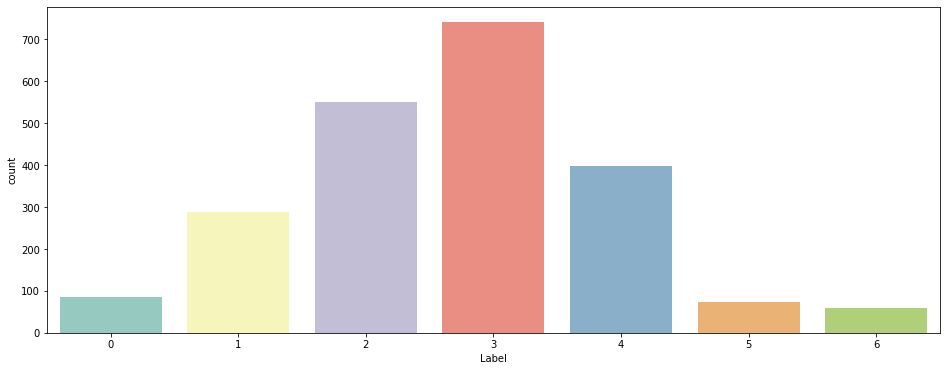

In [19]:
plt.figure(figsize=(16, 6))
sns.countplot(y_train, palette="Set3")

#    Xgboost

## SIMPLE MODEL

In [20]:
xg = XGBClassifier(random_state=1314)
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
y_test_preds = xg.predict(X_test)

     Set    Recall  Precision
0  Train  1.000000   1.000000
1   Test  0.896175   0.897264


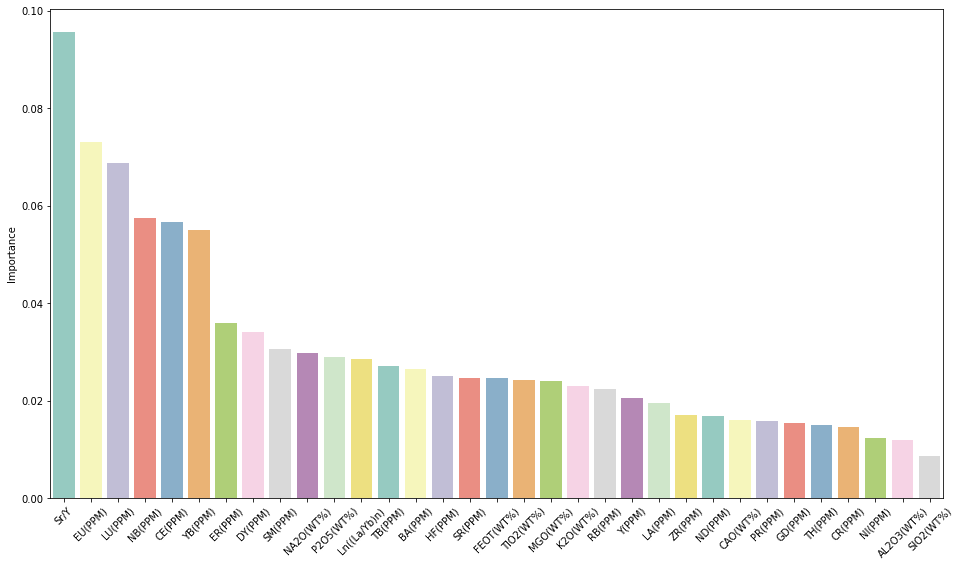

In [21]:
print(get_metrics(xg, X_train, X_test, y_train, y_test))
plot_importance(y, xg, 35)

In [22]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', seed=2021)
xgb.fit(X_train, y_train)
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)


In [23]:
get_metrics(xgb, X_train, X_test, y_train, y_test)

,Set,Recall,Precision
0,Train,1.000000,1.000000
1,Test,0.896175,0.897264


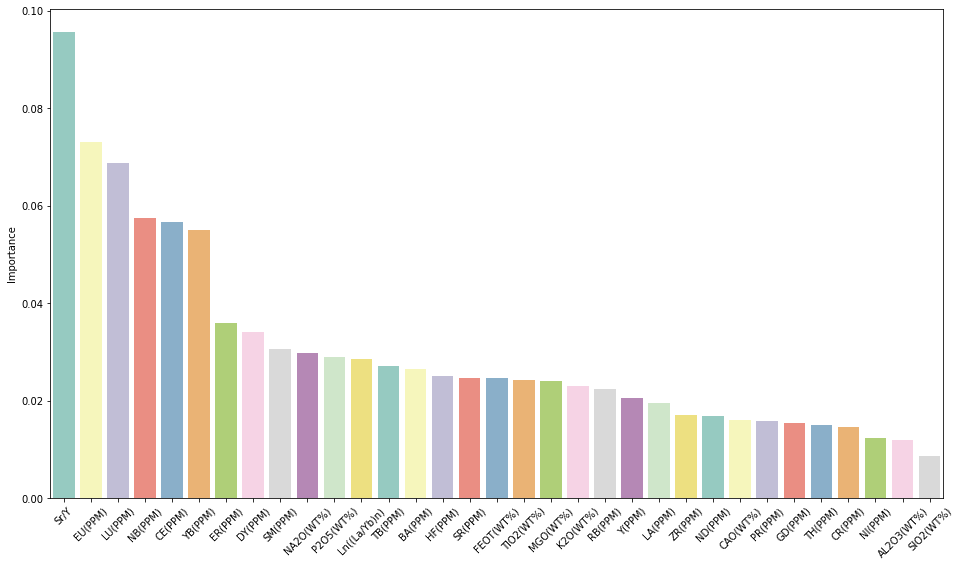

In [24]:
plot_importance(y, xgb, 35)

## model optimization

In [25]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 1]
depth = [3, 4, 5, 6, 7]
min_split = [1, 2, 3, 4, 5]

In [26]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', seed=2021)

In [27]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy') #weight=
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='merror', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=N...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=5,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'eta': [0.01, 0.05, 0.1, 0.2, 1],
                         'gamma': [1, 2, 3, 4, 5],
                         'max_depth': [3, 4, 5, 6, 7]},
             scoring='accuracy')

In [28]:
xgb_cv.best_params_

{'eta': 0.05, 'gamma': 1, 'max_depth': 7}

In [29]:
xgb_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric='merror',
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=5, num_parallel_tree=None, ...)

In [30]:
xgb_cv.best_score_

0.8350797266514807

In [31]:
xgb_best = xgb_cv.best_estimator_

In [32]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [33]:
print(get_metrics(xgb_best, X_train, X_test, y_train, y_test))

     Set    Recall  Precision
0  Train  0.991344   0.991373
1   Test  0.867031   0.868885


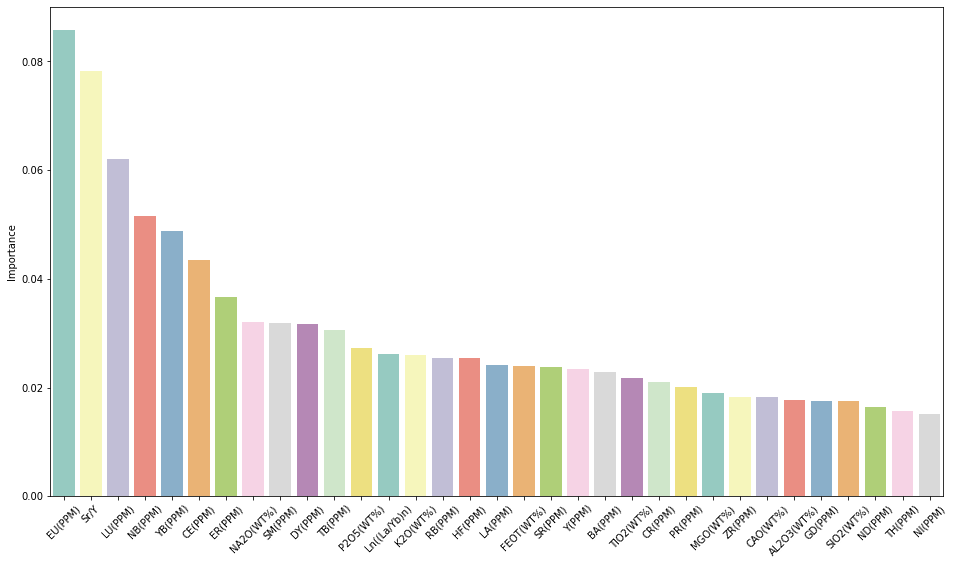

In [34]:
plot_importance(y, xgb_best, 35)

## Save the model

In [58]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 7, eval_metric = 'merror', tree_method='hist', 
                    eta = 0.1, gamma = 1, max_depth = 6, seed=2021)
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='merror',
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=7, num_parallel_tree=None, ...)

In [59]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [60]:
print(get_metrics(xgb_best, X_train, X_test, y_train, y_test))

     Set    Recall  Precision
0  Train  0.986690   0.986820
1   Test  0.847222   0.848961


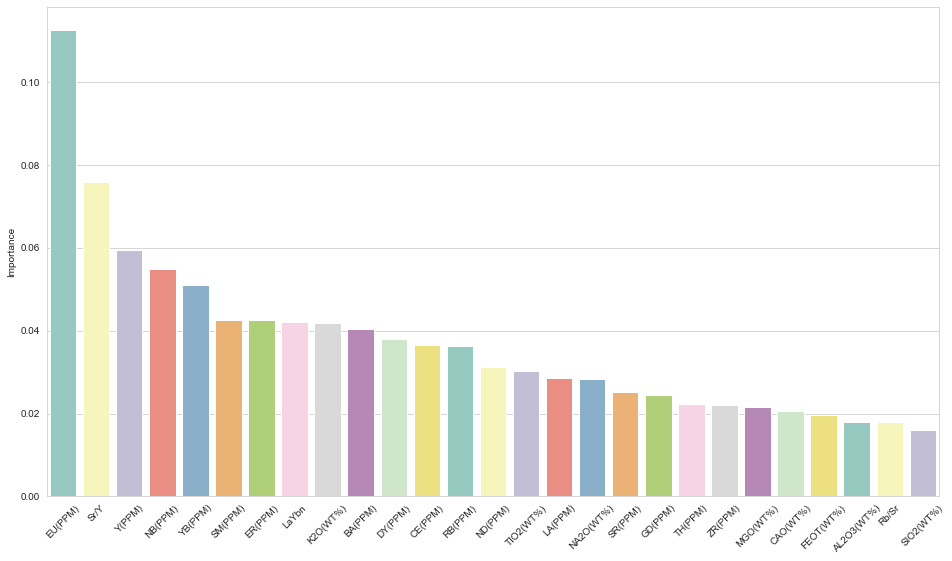

In [61]:
plot_importance(y, xgb_best, 35)

Text(0, 0.5, 'Predictions from Model')

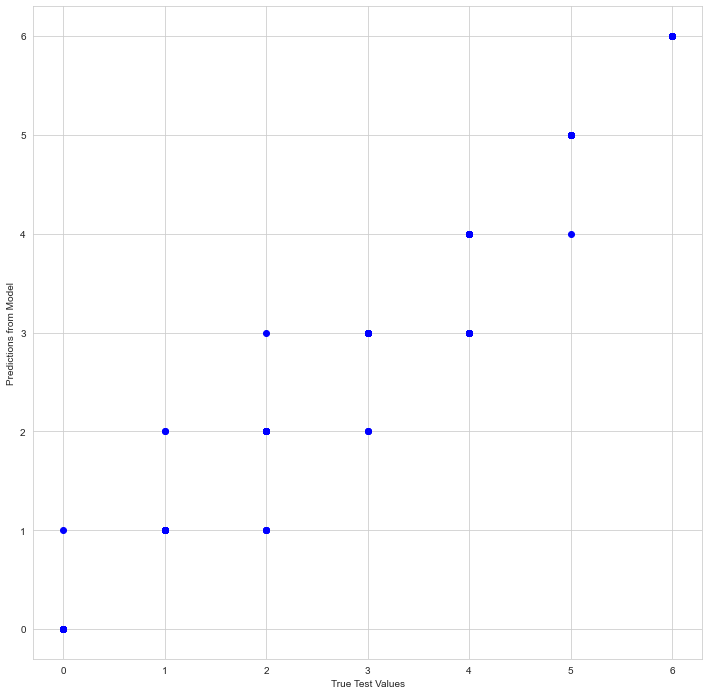

In [62]:
plt.figure(figsize = (12,12))
#plt.scatter(y_test, y_test_preds, color = 'r')
plt.scatter(y_train, y_train_preds, color = 'b')
plt.xlabel('True Test Values')
plt.ylabel('Predictions from Model')


Text(0, 0.5, 'Predictions from Model')

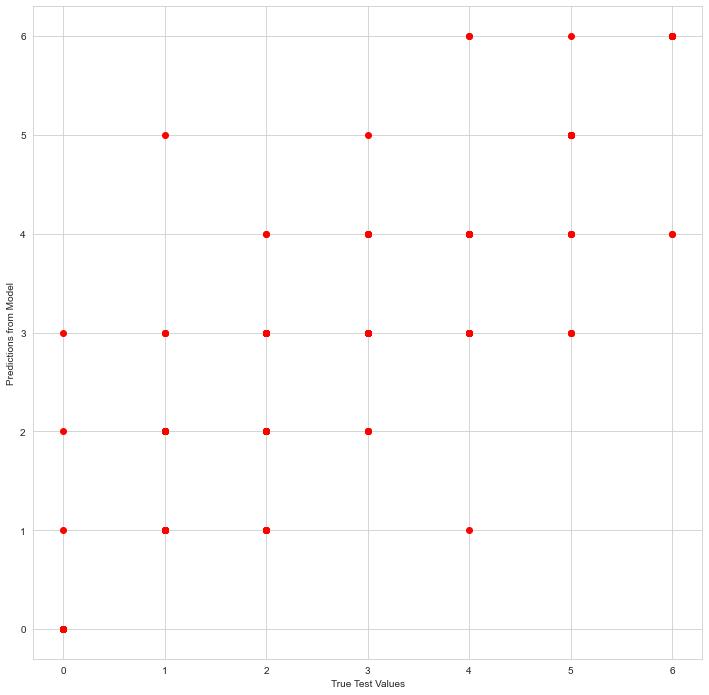

In [63]:
plt.figure(figsize = (12,12))
plt.scatter(y_test, y_test_preds, color = 'r')
#plt.scatter(y_train, y_train_preds, color = 'b')
plt.xlabel('True Test Values')
plt.ylabel('Predictions from Model')